# Feature Scaling, Handling Missing Values

Featuring scaling technique is used for algorithms where distances are involved like KNN,KMeans,Linear Regression etc. Feature scaling doesnt have any impact on algos like Decision Trees,Random Forest,XGBoost etc. 

MinMaxScaler scales data in the range of (0,1) : (x - min/max-min)

StandardScaler scales data by mean and standard deviation (mean,std) : (x-mean/std)

RobustScaler doesnt have impact of outliers as it scales data using median and IQR(25-50)

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('../Day4-Feature_Encoding/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Here columns Age,Annual_Premium,Vintage can be scaled if we are using distance related alogos

# MinMaxScaler

In [3]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler().fit(df[['Age','Annual_Premium','Vintage']])
norm_values=norm.transform(df[['Age','Annual_Premium','Vintage']])
print(norm_values)

[[0.36923077 0.07036565 0.71626298]
 [0.86153846 0.05749579 0.59861592]
 [0.41538462 0.06634731 0.05882353]
 ...
 [0.01538462 0.06043886 0.52249135]
 [0.73846154 0.07811026 0.22145329]
 [0.4        0.07282689 0.78546713]]


In [4]:
print(norm.data_min_,norm.data_max_)

[  20. 2630.   10.] [8.50000e+01 5.40165e+05 2.99000e+02]


# StandardScaler

In [5]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler().fit(df[['Age','Annual_Premium','Vintage']])
std_values=std_scaler.transform(df[['Age','Annual_Premium','Vintage']])
print(std_values)

[[ 0.33377727  0.57453868  0.74879538]
 [ 2.39675074  0.17263624  0.34244286]
 [ 0.52718104  0.4490531  -1.52199808]
 ...
 [-1.14898491  0.26454281  0.07950888]
 [ 1.88100737  0.81638891 -0.96027549]
 [ 0.46271311  0.6513986   0.98782627]]


In [6]:
print(std_scaler.mean_)

[   38.82258357 30564.38958146   154.34739668]


# RobustScaler

In [7]:
from sklearn.preprocessing import RobustScaler
RobustScaler_scaler=RobustScaler().fit(df[['Age','Annual_Premium','Vintage']])
Robust_values=RobustScaler_scaler.transform(df[['Age','Annual_Premium','Vintage']])
print(Robust_values)

[[ 0.33333333  0.58586195  0.43448276]
 [ 1.66666667  0.12450817  0.2       ]
 [ 0.45833333  0.44181394 -0.87586207]
 ...
 [-0.625       0.23001     0.04827586]
 [ 1.33333333  0.86348783 -0.55172414]
 [ 0.41666667  0.67409136  0.57241379]]


In [8]:
print(RobustScaler_scaler.quantile_range,RobustScaler_scaler.center_)

(25.0, 75.0) [   36. 31669.   154.]


# Handling Missing Categorical Values

Missing values can be handled by any of the below technique

1) Deleting that samples - not prefereed as it results in loss of data

2) Replacing NaN values with most frequent categorical values - this might create imbalance in that feature

3) Predict the missing values using other features and a simple classifier - yields good results

4) Using clustering techniques like KMeans

## Missing Data Types

1) A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

2) Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

3) Missing At Random(MAR) - 
Ex : Men---hide their salary,
Women---hide their age

Lets check the handling of different types of missing data using titanic dataset

In [9]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### All the techniques of handling ,missing values

1. Mean/ Median replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

In [12]:
df.shape

(891, 12)

In [15]:
df['Age_null']=np.where(df['Age'].isnull(),1,0)
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)
print(df['Age_null'].mean())
print(df['Cabin_null'].mean())

0.19865319865319866
0.7710437710437711


20 % and 77% of Age and cabin values are null

We can check whether these null values are at random or if there is some relationship present

In [17]:
df.groupby(['Survived'])['Age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: Age_null, dtype: float64

In [18]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

This means the null values of Age and Cabin are frequent for those who didnt survive.Implies there is Missing Data Not At Random(MNAR) case.

### Mean/ Median replacement

We can use median instead of mean if there are outliers in the data

In [19]:
df=pd.read_csv('titanic.csv',usecols=['Age','Cabin','Survived'])
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [22]:
mean=df['Age'].mean()
median=df['Age'].median()
print(mean,'------',median)
df['Age_mean']=df['Age'].fillna(value=mean)
df['Age_median']=df['Age'].fillna(value=median)
df.head()

29.69911764705882 ------ 28.0


,Survived,Age,Cabin,Age_mean,Age_median
0,0,22.0,NaN,22.0,22.0
1,1,38.0,C85,38.0,38.0
2,1,26.0,NaN,26.0,26.0
3,1,35.0,C123,35.0,35.0
4,0,35.0,NaN,35.0,35.0


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

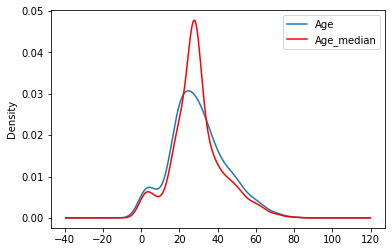

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

This method is fast and easy to implement but there will be change in variance of distribution as above.

### Random Sample Imputation

A random sample is imputed in the null values

In [33]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [36]:
df['Age'].isnull().sum()

177

In [38]:
random_vals=df['Age'].dropna().sample(df['Age'].isnull().sum())
random_vals

807    18.00
707    42.00
405    34.00
712    48.00
171     4.00
       ...  
160    44.00
150    51.00
329    16.00
831     0.83
875    15.00
Name: Age, Length: 177, dtype: float64

In [39]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [42]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(value=median)
    df[variable+'_random']=df[variable]
    samples=df[variable+'_random'].dropna().sample(df[variable+'_random'].isnull().sum())
    samples.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=samples

In [44]:
impute_nan(df,'Age',df['Age'].median())
df.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,21.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


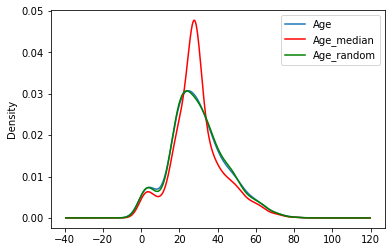

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='red')
df['Age_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

From above we can observe that the variance of both Age and Age_random is same. This method is also fats and easy to implement but it might not work in all cases

### Capturing NAN values with a new feature

A new feature is used to denote a missing value in this case

In [47]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [48]:
df['Age_missing_col']=np.where(df['Age'].isnull(),1,0)
df.head(6)

,Survived,Age,Fare,Age_missing_col
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1


In [51]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.head(6)

,Survived,Age,Fare,Age_missing_col
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1


By this method we can determine the importance of missing column by a new column, the problem occurs when there are more no of features with missing values and this method might result in curse of dimensionality.

### End of Distribution imputation

In this method, nan values are replaced with values which are at the edge of distribution

In [58]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


<AxesSubplot:ylabel='Density'>

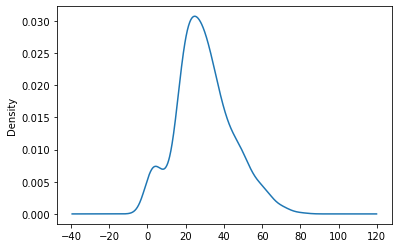

In [59]:
df['Age'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

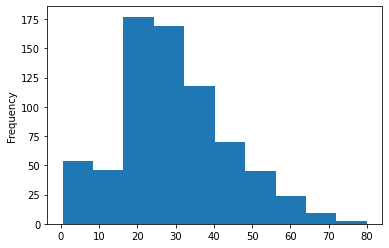

In [60]:
df['Age'].plot(kind='hist')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

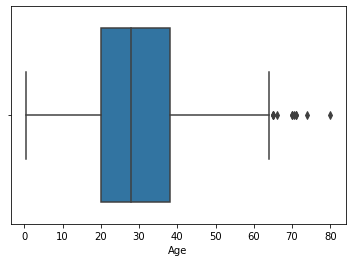

In [61]:
sns.boxplot('Age',data=df)

In [62]:
extreme=df['Age'].mean()+3*df['Age'].std()
print(extreme)

73.27860964406095


<AxesSubplot:ylabel='Density'>

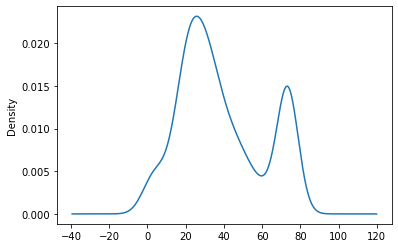

In [63]:
df['Age'].fillna(value=extreme,inplace=True)
df['Age'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

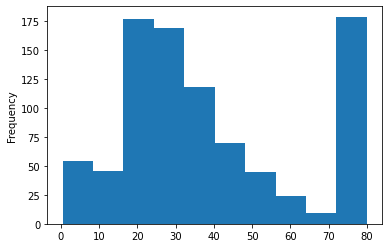

In [64]:
df['Age'].plot(kind='hist')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

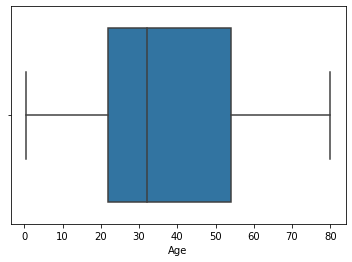

In [65]:
sns.boxplot('Age',data=df)

Easy to implement but distorts the original distribution, if nan are more, outliers are masked in distribution and if nan are less, they might be considered as outliers. Original predictive power might be lost. 

### Arbitrary imputation

imputing values with some arbitrary values

In [66]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [67]:
df['Age_arbit']=df['Age'].fillna(value=150)
df.head(6)

,Survived,Age,Fare,Age_arbit
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,150.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

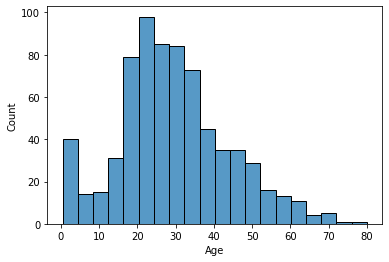

In [68]:
sns.histplot(x='Age',data=df)

<AxesSubplot:xlabel='Age_arbit', ylabel='Count'>

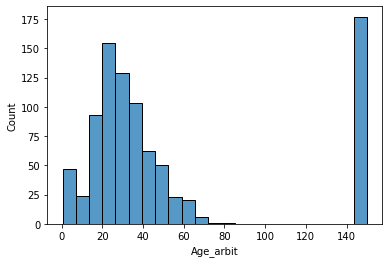

In [69]:
sns.histplot(x='Age_arbit',data=df)

This above method is almost same as that end of distribution imputation

### Mode Replacement

we can also replace the nan values with most frequent values/Mode

In [78]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [90]:
mode=df['Age'].mode()
print(type(mode))
print(mode[0])

<class 'pandas.core.series.Series'>
24.0


In [91]:
df['Age_mode']=df['Age'].fillna(value=mode[0])
df.head(6)

,Survived,Age,Fare,Age_mode
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,24.0


### Handling missing Categorical values

lets check how to handle the missing categorical values using advance house price prediction

In [109]:
df=pd.read_csv('house-price-pred.csv')
df.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [110]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [111]:
df=pd.read_csv('house-price-pred.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(6)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000


In [112]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [113]:
df.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

In [114]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [115]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [116]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='FireplaceQu'>

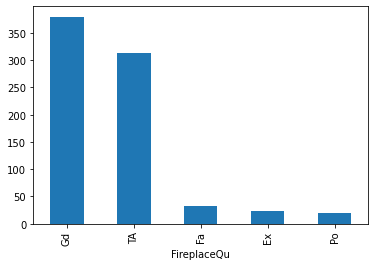

In [117]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot(kind='bar')

We can impute missing values with frequent values if nan count is less

In [118]:
def impute_cat(df,variable):
    freq_cat=df[variable].value_counts().index[0]
    df[variable].fillna(value=freq_cat,inplace=True)

In [119]:
for col in df.columns:
    impute_cat(df,col)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


For FireplaceQu, the above method is not good as it has high nan values